x_point: [-19000 -15000]
y_point: [-8500 -7400]
coefficients: [ 2.750e-01 -3.275e+03]
point: (x: -16345.454545454551, y: -7770)
point: (x: -17472.72727272728, y: -8080)
point: (x: -17581.818181818187, y: -8110)
point: (x: -17981.818181818187, y: -8220)


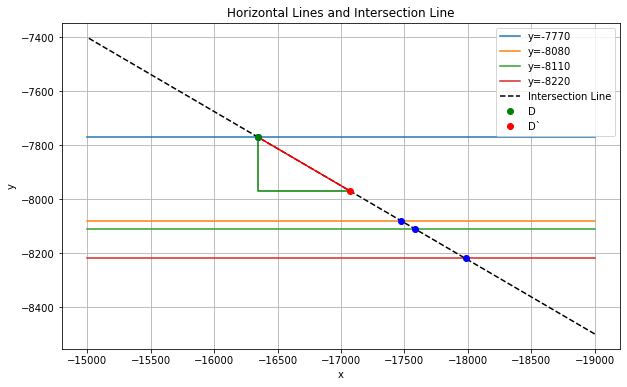

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Создайте диапазон значений x
x_values = np.linspace(-19000, -15000, 1000)  # 1000 точек от 10000 до 20000

# Задайте значения y для горизонтальных линий
y_values = [-7770, -8080, -8110, -8220]

# Определите координаты для прямой линии
x_point = np.array([-19000, -15000])
y_point = np.array([-8500, -7400])
print(f'x_point: {x_point}')
print(f'y_point: {y_point}')

# Вычислите коэффициенты для прямой линии
coefficients = np.polyfit(x_point, y_point, 1)
print(f'coefficients: {coefficients}')

# Вычислите значения y для прямой линии
y_line_values = np.polyval(coefficients, x_values)
#print(f'y_line_values: {y_line_values}')


### plt.show()
# Постройте график для каждой строки y
plt.figure(figsize=(10, 6))
for y in y_values:
    plt.plot(x_values, np.full_like(x_values, y), label=f'y={y}')

# Добавьте прямую линию
plt.plot(x_values, y_line_values, 'k--', label='Intersection Line')


# Найдите и добавьте точки пересечения
for y in y_values:
    x_intersect = (y - coefficients[1]) / coefficients[0]
    plt.plot(x_intersect, y, 'bo')  # 'ro' указывает на красные кружки
    print(f'point: (x: {x_intersect}, y: {y})')

y_intersection = y_values[0]
x_intersection = (y_intersection - coefficients[1]) / coefficients[0]

###
# Задаем начальную точку, длину вертикального катета и угол наклона
start_point = np.array([x_intersection, y_intersection])  # начальная точка (x, y)
vertical_leg = 200  # длина вертикального катета
angle_v = np.degrees(np.arctan(coefficients[0]))  # угол наклона в градусах

# меняем ось отсчета угла
angle = 90 - angle_v

# Переводим угол в радианы
angle_rad = np.radians(angle)

# Вычисляем длину горизонтального катета
horizontal_leg = vertical_leg * np.tan(angle_rad)

# Определяем точки треугольника
triangle_points = np.array([start_point, 
                            start_point - np.array([0, vertical_leg]), 
                            start_point - np.array([horizontal_leg, vertical_leg])])

# Рисуем треугольник
plt.plot(triangle_points[:, 0], triangle_points[:, 1], 'g-')

# Добавляем линию от начальной точки до конечной точки перемещения
plt.plot([start_point[0], triangle_points[2][0]], 
         [start_point[1], triangle_points[2][1]], 'r-')

# Рисуем начальную точку
plt.plot(start_point[0], start_point[1], 'go', label=f'D')

# Рисуем точку перемещения
plt.plot(triangle_points[2][0], triangle_points[2][1], 'ro', label=f'D`')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.legend()
plt.grid(True)
# вписывает график
#plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_xaxis()  # Инвертируем ось X
plt.show()